In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

from datetime import date
import datetime

import numpy as np

## Settings

In [2]:
x_size, y_size = 12,8
plt.rcParams.update({'font.size': 16})

In [3]:
sns.set_style("white")
flatui = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']
#flatui = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
#flatui = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f']
sns.set_palette(flatui)

## Read the data

In [4]:
#df = pd.read_csv('Podatki o prometu v Ljubljani 9 - 11 september 2020.csv')
df = pd.read_csv("data\\google\\Podatki o prometu v Ljubljani 5 oktober - 8 november 2020.csv", encoding="utf8", skiprows=1)
routes = pd.read_csv('data\\google\\routes 9 - 11 september 2020.csv')

In [5]:
df = df.rename(columns={"t_duration_in_traffic_[s]":"dt"}) 

In [6]:
df

,Unnamed: 0,timestamp,route_id,dt,t_duration_[s],t_distance_[m],w_city,w_description,w_visibility,w_clouds,w_temperature,w_temperature_feel,w_pressure,w_humidity,w_wind_speed,w_wind_degree,w_sunrise,w_sunset
0,0,2020-10-04 23:30:00.281085,0,812.0,918.0,6894.0,Ljubljana,clear sky,10000.0,3.0,10.95,10.51,1008.0,92.0,0.58,213.0,1.601788e+09,1.601829e+09
1,1,2020-10-04 23:30:00.733197,1,496.0,517.0,3601.0,Ljubljana,clear sky,10000.0,3.0,10.95,10.51,1008.0,92.0,0.58,213.0,1.601788e+09,1.601829e+09
2,2,2020-10-04 23:30:01.132201,2,492.0,586.0,3681.0,Ljubljana,broken clouds,10000.0,75.0,10.92,10.87,1009.0,100.0,0.50,0.0,1.601788e+09,1.601829e+09
3,3,2020-10-04 23:30:01.912402,3,419.0,518.0,3068.0,Ljubljana,broken clouds,10000.0,75.0,10.92,10.87,1009.0,100.0,0.50,0.0,1.601788e+09,1.601829e+09
4,4,2020-10-04 23:30:02.727843,4,522.0,612.0,4118.0,Ljubljana,clear sky,10000.0,3.0,10.92,10.65,1008.0,92.0,0.33,196.0,1.601788e+09,1.601829e+09
5,5,2020-10-04 23:30:05.418803,5,658.0,732.0,12459.0,Ljubljana,clear sky,10000.0,3.0,10.92,10.65,1008.0,92.0,0.33,196.0,1.601788e+09,1.601829e+09
6,6,2020-10-04 23:40:00.181404,0,787.0,918.0,6894.0,Ljubljana,clear sky,10000.0,3.0,10.95,10.51,1008.0,92.0,0.58,213.0,1.601788e+09,1.601829e+09
7,7,2020-10-04 23:40:00.559779,1,477.0,517.0,3601.0,Ljubljana,clear sky,10000.0,3.0,10.95,10.51,1008.0,92.0,0.58,213.0,1.601788e+09,1.601829e+09
8,8,2020-10-04 23:40:00.903683,2,495.0,586.0,3681.0,Ljubljana,broken clouds,10000.0,75.0,10.92,10.87,1009.0,100.0,0.50,0.0,1.601788e+09,1.601829e+09
9,9,2020-10-04 23:40:01.267617,3,425.0,518.0,3068.0,Ljubljana,broken clouds,10000.0,75.0,10.92,10.87,1009.0,100.0,0.50,0.0,1.601788e+09,1.601829e+09


## Distribution plots

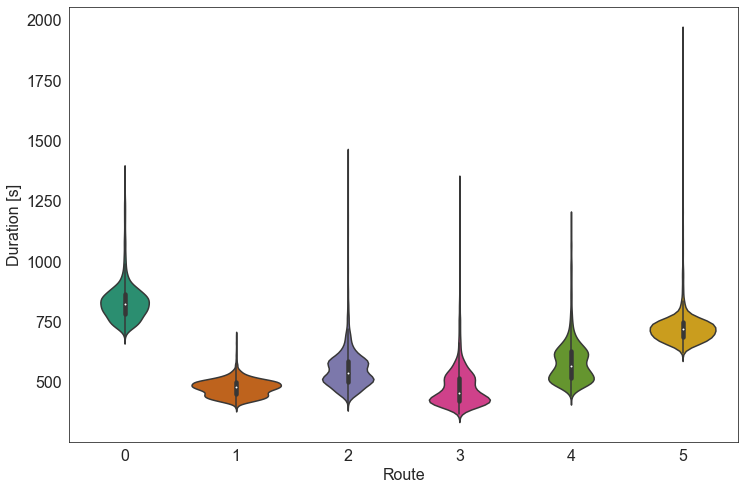

In [7]:
sns.violinplot(data=df, y='dt', x='route_id')
f = plt.gcf()
f.set_size_inches(x_size, y_size)
plt.xlabel("Route")
plt.ylabel("Duration [s]")
plt.xticks
plt.savefig("figs\\distributions_duration.pdf", bbox_inches="tight")
plt.savefig("figs\\distributions_duration.png", bbox_inches="tight")
plt.savefig("figs\\distributions_duration.svg", bbox_inches="tight")
plt.show()

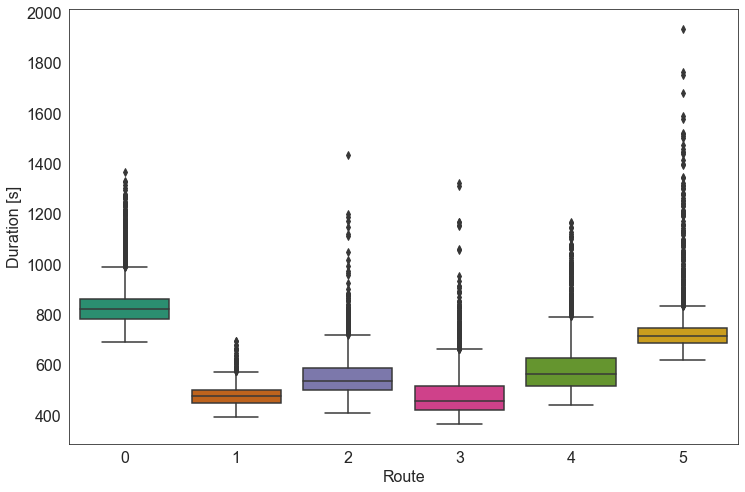

In [8]:
sns.boxplot(data=df, y='dt', x='route_id')
f = plt.gcf()
f.set_size_inches(x_size, y_size)
plt.xlabel("Route")
plt.ylabel("Duration [s]")
plt.xticks
plt.savefig("figs\\distributions_duration_box.pdf", bbox_inches="tight")
plt.savefig("figs\\distributions_duration_box.png", bbox_inches="tight")
plt.savefig("figs\\distributions_duration_box.svg", bbox_inches="tight")
plt.show()

In [9]:
df['timestamp']=df['timestamp'].map(lambda d:datetime.datetime.strptime(d,'%Y-%m-%d %H:%M:%S.%f'))

In [10]:
#df['day'] = df['timestamp'].map(lambda d:datetime.datetime.strptime(d,'%Y-%m-%d %H:%M:%S.%f')).map(date.weekday)
df['day'] = df['timestamp'].map(date.weekday)
df['hour'] = pd.DatetimeIndex(df['timestamp']).hour
df['date'] = pd.DatetimeIndex(df['timestamp']).date
df['time'] = pd.DatetimeIndex(df['timestamp']).hour + pd.DatetimeIndex(df['timestamp']).minute/60 + pd.DatetimeIndex(df['timestamp']).second/3600

In [11]:
routes = df.route_id.unique()
df['t_norm'] = 0
df['t_mean'] = 0

for route in routes:
    
    df.loc[df['route_id'] == route,'t_mean'] = df.loc[df['route_id'] == route,'dt'].mean()
    df.loc[df['route_id'] == route,'t_norm'] = df.loc[df['route_id'] == route,'dt']/df.loc[df['route_id'] == route,'dt'].mean()

# ANOVA
https://www.pythonfordatascience.org/anova-python/
http://www.pybloggers.com/2016/03/three-ways-to-do-a-two-way-anova-with-python/


## Using `stats`
Podpira samo one-way

In [12]:
import scipy.stats as stats

In [13]:
stats.f_oneway(df['dt'][df['day'] == 2],
               df['dt'][df['day'] == 3],
               df['dt'][df['day'] == 4])

F_onewayResult(statistic=nan, pvalue=nan)

In [14]:
stats.f_oneway(df['dt'][df['route_id'] == 0],
               df['dt'][df['route_id'] == 1],
               df['dt'][df['route_id'] == 2],
               df['dt'][df['route_id'] == 3],
               df['dt'][df['route_id'] == 4],
               df['dt'][df['route_id'] == 5])

F_onewayResult(statistic=nan, pvalue=nan)

## Using `statmodels`

Optional: Convert categorical variables to strings. 

Opomba: če pustiš podatke v tipu `int` so rezultati drastično drugačni. Alternativa je, da pri klicu funkcije `ols` specificiraš, da je spremenljivka kategorična!



In [15]:
#df['route_id'] = df['route_id'].astype(str)
#df['day'] = df['day'].astype(str)

In [16]:
#df['route_id'] = df['route_id'].astype(int)
#df['day'] = df['day'].astype(int)

### 2-way

In [17]:
traffic_model = ols('dt ~ C(route_id)*C(day)', data=df).fit()
#traffic_model = ols('dt ~ route_id*day', data=df).fit()
table = sm.stats.anova_lm(traffic_model, typ=2) # Type 2 ANOVA DataFrame
table

,sum_sq,df,F,PR(>F)
C(route_id),4.227694e+08,5.0,14406.738915,0.000000e+00
C(day),1.061843e+07,6.0,301.537386,0.000000e+00
C(route_id):C(day),1.790965e+06,30.0,10.171804,5.561329e-47
Residual,1.434044e+08,24434.0,NaN,NaN


In [18]:
#traffic_model = ols('dt ~ C(route_id)+C(day)', data=df).fit()
#table = sm.stats.anova_lm(traffic_model, typ=2) # Type 2 ANOVA DataFrame
#table

### 3-way

In [19]:
traffic_model = ols('dt ~ C(route_id)*C(hour)*C(day)', data=df).fit()
table = sm.stats.anova_lm(traffic_model, typ=3) # Type 2 ANOVA DataFrame
table

,sum_sq,df,F,PR(>F)
Intercept,1.424963e+07,1.0,6136.050336,0.000000e+00
C(route_id),2.315592e+06,5.0,199.424009,7.061676e-209
C(hour),2.713834e+06,23.0,50.809020,1.314218e-226
C(day),7.318033e+03,6.0,0.525205,7.896336e-01
C(route_id):C(hour),2.449145e+06,115.0,9.170692,1.216984e-147
C(route_id):C(day),6.760665e+04,30.0,0.970406,5.117452e-01
C(hour):C(day),2.739545e+06,138.0,8.548397,5.932106e-160
C(route_id):C(hour):C(day),5.674340e+06,690.0,3.541210,7.085408e-181
Residual,5.449927e+07,23468.0,NaN,NaN


# Circadian analysis

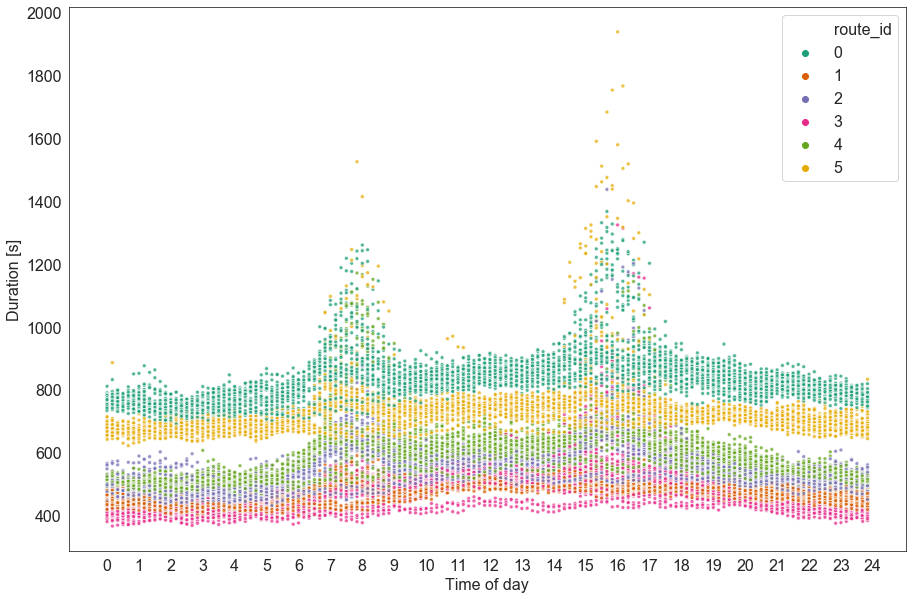

In [20]:
#sns.scatterplot(data=df.iloc[:1000,:], y='dt', x='time', hue='route_id', alpha=0.75)
#sns.lineplot(data=df.iloc[:1000,:], y='dt', x='time', hue='route_id', alpha=0.75)

sns.scatterplot(data=df, y='dt', x='time', hue='route_id', alpha=0.75, palette = flatui, s=15)
#sns.lineplot(data=df, y='dt', x='time', hue='route_id', alpha=0.75)


f = plt.gcf()
f.set_size_inches(15,10)
plt.xlabel("Time of day")
plt.ylabel("Duration [s]")

plt.xticks(np.arange(25), np.arange(25))
#plt.legend(routes.astype(str))
plt.show()

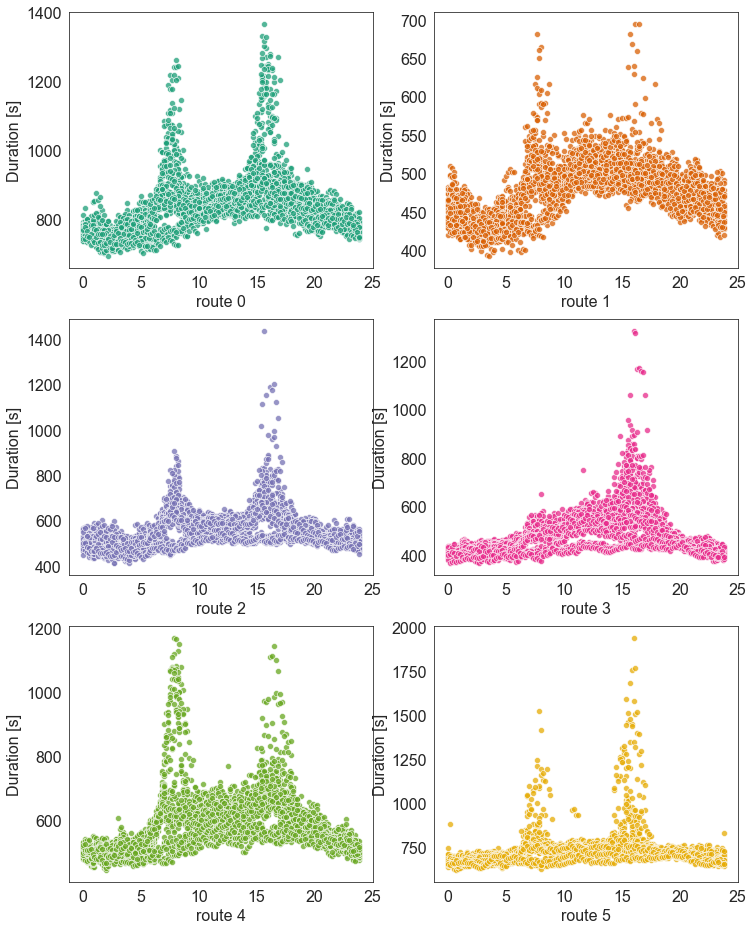

In [21]:
routes = df.route_id.unique()
fig, axes = plt.subplots(3,2)

for i, (route, color) in enumerate(zip(routes,flatui)):
    ax = axes.flat[i]
    sns.scatterplot(data=df[df.route_id == route], y='dt', x='time', alpha=0.75, color=color, ax = ax)
    ax.set_xlabel("route " + str(route))
    ax.set_ylabel("Duration [s]")
    

f = plt.gcf()
f.set_size_inches(x_size, 2*y_size)
plt.savefig("figs\\circadian_duration.pdf", bbox_inches="tight")
plt.savefig("figs\\circadian_duration.png", bbox_inches="tight")
plt.savefig("figs\\circadian_duration.svg", bbox_inches="tight")
plt.show()    


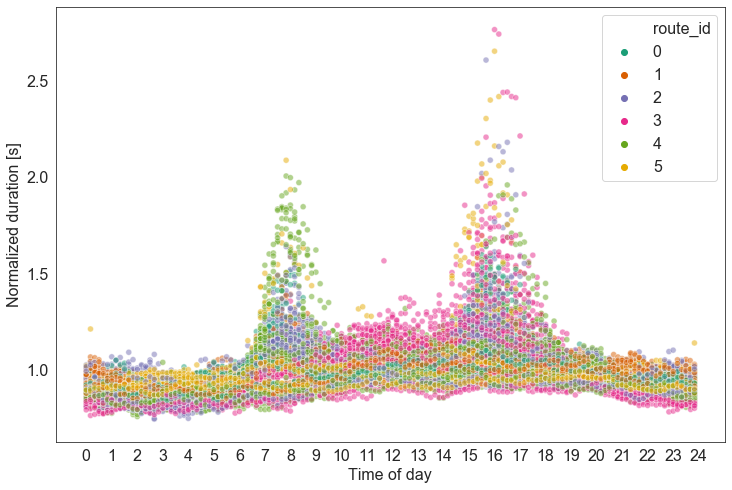

In [22]:
#sns.scatterplot(data=df.iloc[:1000,:], y='dt', x='time', hue='route_id', alpha=0.75)
#sns.lineplot(data=df.iloc[:1000,:], y='dt', x='time', hue='route_id', alpha=0.75)

sns.scatterplot(data=df, y='t_norm', x='time', hue='route_id', alpha=0.5, palette = flatui)
#sns.lineplot(data=df, y='dt', x='time', hue='route_id', alpha=0.75)


f = plt.gcf()
f.set_size_inches(x_size, y_size)
plt.xlabel("Time of day")
plt.ylabel("Normalized duration [s]")

plt.xticks(np.arange(25), np.arange(25))
#plt.savefig("time_normalized.pdf", bbox_inches="tight")
#plt.legend(routes.astype(str))
plt.show()